In [371]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pickle 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from keras.losses import binary_crossentropy




In [372]:
train_data=pd.read_csv('train.csv')
print(len(train_data))

891


In [373]:
train_data.info()
train_data.drop_duplicates(inplace=True)
print(len(train_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
891


In [374]:
train_data.dropna(inplace=True,how='all')
print(len(train_data))

891


In [375]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [376]:
train_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [377]:
y_train=train_data['Survived']
x_train=pd.DataFrame(train_data.drop(axis=1,columns='Survived'))
print('shape of y',y_train.shape)
print('shape of x',x_train.shape)

shape of y (891,)
shape of x (891, 11)


0    549
1    342
Name: Survived, dtype: int64


<Axes: >

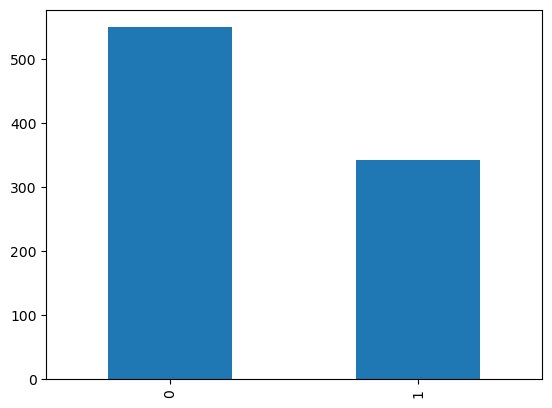

In [378]:
z=y_train.value_counts()
print(z)
z.plot(kind='bar')

In [380]:

class preprocessing:
    def __init__(self,x_train,x_test,y=None):
        self.Sex_encoder=LabelEncoder()
        self.emabrk_encodeing=LabelEncoder()
        self.normlize_fare=MinMaxScaler()
        self.age_norm=MinMaxScaler()
        self.tickit=LabelEncoder()
        self.x_testt=x_test
        self.x_trainn=x_train
        
        
    def encoding_normlization(self,train):
        if train:
            self.emabrk_encodeing.fit(self.x_trainn['Embarked'])
            self.x_trainn['Embarked']=self.emabrk_encodeing.transform(self.x_trainn['Embarked'])
            self.Sex_encoder.fit(self.x_trainn['Sex'])
            self.x_trainn['Sex']=self.Sex_encoder.transform(self.x_trainn['Sex'])
            self.normlize_fare.fit(np.array(self.x_trainn['Fare']).reshape(-1,1))
            self.x_trainn["Fare"]=self.normlize_fare.transform(np.array(self.x_trainn['Fare']).reshape(-1,1))
            self.age_norm.fit(np.array(self.x_trainn['Age']).reshape(-1,1))
            self.x_trainn["Age"]= self.age_norm.transform(np.array(self.x_trainn['Age']).reshape(-1,1))
            self.x_trainn.drop(axis=1,columns='Ticket',inplace=True) 
            self.x_trainn.drop(axis=1,columns='Embarked',inplace=True) 

        else:
            self.x_testt['Embarked']=self.emabrk_encodeing.transform(self.x_testt['Embarked'])
            self.x_testt['Sex']=self.Sex_encoder.transform(self.x_testt['Sex'])
            self.x_testt["Fare"]=self.normlize_fare.transform(np.array(self.x_testt['Fare']).reshape(-1,1))
            self.x_testt["Age"]= self.age_norm.transform(np.array(self.x_testt['Age']).reshape(-1,1))
            self.x_testt.drop(axis=1,columns='Ticket',inplace=True) 
            self.x_testt.drop(axis=1,columns='Embarked',inplace=True) 

    def cleans(self,data):
         cols=['Name','Cabin','PassengerId']
         if data: 
            for i in cols:
              self.x_trainn.drop(axis=1,columns=i,inplace=True)  
         else:
             for i in cols:
              self.x_testt.drop(axis=1,columns=i,inplace=True)  
             

            
    def fillnals(self, data): 
      cols = self.x_trainn.columns
      if data:
         modes = []
         for col in cols:
             modes.append(self.x_trainn[col].mode())
         for col, mode in zip(cols, modes):
             self.x_trainn[col].fillna(mode[0], inplace=True)
      else:
         modest = []
         for col in cols:
             modest.append(self.x_testt[col].mode())
         for col, mode in zip(cols, modest):
             self.x_testt[col].fillna(mode[0], inplace=True)



In [381]:
x_test=pd.read_csv('test.csv')
y_test=pd.read_csv('gender_submission.csv')
y_test=y_test['Survived']

In [382]:
x_train.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [383]:
x_test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [384]:
preprocessor=preprocessing(x_train,x_test)

In [385]:
preprocessor.cleans(True)
preprocessor.fillnals(True)
preprocessor.encoding_normlization(True)

In [386]:
preprocessor.cleans(False)
preprocessor.fillnals(False)
preprocessor.encoding_normlization(False)

In [387]:
from imblearn.under_sampling import RandomUnderSampler

smote = RandomUnderSampler()
X_smote, y_smote = smote.fit_resample(x_train,y_train)

0    342
1    342
Name: Survived, dtype: int64


<Axes: >

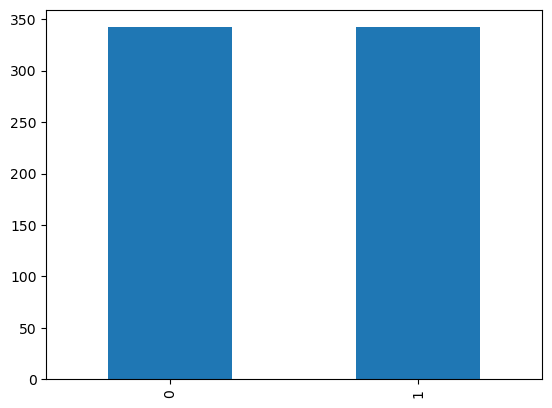

In [388]:
z=y_smote.value_counts()
print(z)
z.plot(kind='bar')

In [410]:
x_trai,x_tes,y_trai,y_tes=train_test_split(x_train,y_train,train_size=0.8,random_state=42,shuffle=True,stratify=y_train)

In [504]:
model=SVC(kernel="linear",C=0.01)
model.fit(x_trai,y_trai)
y_trainpre=model.predict(x_trai)
y_test_ptr=model.predict(x_tes)
y_tes_pred=model.predict(x_test)
print('traing_acc',accuracy_score(y_trai,y_trainpre))
print('validtion_acc',accuracy_score(y_tes,y_test_ptr))
print('testing_acc',accuracy_score(y_test,y_tes_pred))

traing_acc 0.7893258426966292
validtion_acc 0.7821229050279329
testing_acc 1.0


In [506]:
test=pd.read_csv('test.csv')
id=test['PassengerId']
labels=y_tes_pred
data = {'PassengerId': test['PassengerId'], 'Survived':labels}
d= pd.DataFrame(data, columns=['PassengerId', 'Survived'])
d.head(3)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [507]:
d.to_csv('submission.csv',index=False)

In [515]:
rfc = RandomForestClassifier(n_estimators=1, max_features='log2')
model.fit(x_trai,y_trai)
y_trainpre=model.predict(x_trai)
y_test_ptr=model.predict(x_tes)
y_tes_pred=model.predict(x_test)
print('traing_acc',accuracy_score(y_trai,y_trainpre))
print('validtion_acc',accuracy_score(y_tes,y_test_ptr))
print('testing_acc',accuracy_score(y_test,y_tes_pred))


traing_acc 0.7893258426966292
validtion_acc 0.7821229050279329
testing_acc 1.0


In [517]:
test=pd.read_csv('test.csv')
id=test['PassengerId']
labels=y_tes_pred
data = {'PassengerId': test['PassengerId'], 'Survived':labels}
d= pd.DataFrame(data, columns=['PassengerId', 'Survived'])
d.head(3)
d.to_csv('submission.csv',index=False)


In [440]:
x_trai=np.array(x_trai)
y_trai=np.array(y_trai)
x_tes=np.array(x_tes)
y_tra=np.array(y_train)
y_tes=np.array(y_tes)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [468]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(None,x_train.shape[1])))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))


In [471]:
model.compile(optimizer=tf.optimizers.Adam(0.01),metrics=['accuracy'],loss="BinaryCrossentropy")

In [474]:
h=model.fit(x_trai,y_trai,validation_data=(x_tes,y_tes),epochs=30,batch_size=1)

Epoch 1/30
712/712 [==============================] - 1s 2ms/step - loss: 0.5622 - accuracy: 0.7275 - val_loss: 0.4893 - val_accuracy: 0.8045
Epoch 2/30
712/712 [==============================] - 1s 2ms/step - loss: 0.5579 - accuracy: 0.7472 - val_loss: 0.5455 - val_accuracy: 0.7095
Epoch 3/30
712/712 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.7486 - val_loss: 0.4735 - val_accuracy: 0.8045
Epoch 4/30
712/712 [==============================] - 1s 2ms/step - loss: 0.5523 - accuracy: 0.7514 - val_loss: 0.4918 - val_accuracy: 0.7709
Epoch 5/30
712/712 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7346 - val_loss: 0.5272 - val_accuracy: 0.7207
Epoch 6/30
712/712 [==============================] - 1s 2ms/step - loss: 0.5276 - accuracy: 0.7626 - val_loss: 0.5675 - val_accuracy: 0.7039
Epoch 7/30
712/712 [==============================] - 1s 2ms/step - loss: 0.5486 - accuracy: 0.7472 - val_loss: 0.5096 - val_accuracy: 0.7765
Epoch 

In [475]:
model.evaluate(x_test,y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.9785


[0.26384615898132324, 0.9784688949584961]

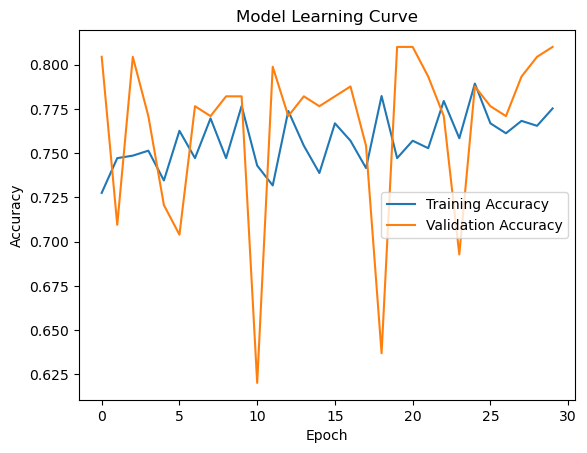

In [476]:
plt.plot(h.history['accuracy'], label='Training Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
